In [9]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
sns.set()
tf.enable_eager_execution()

In [3]:
tfd = tfp.distributions
tfk = tfp.positive_semidefinite_kernels
tfe = tf.contrib.eager

In [4]:
def f(x):
    return np.sin(3*x) + np.random.normal(loc=0, scale=0.2, size=(len(x), 1))

def toy_data(num_obs_points, var_obs_noise):
    
    index_points = np.random.uniform(0., 5., size=(num_obs_points, 1)).astype(np.float32)
    observations = f(index_points) + np.random.normal(loc=0,
                                                      scale=np.sqrt(var_obs_noise),
                                                      size=(num_obs_points, 1))
    return index_points, observations

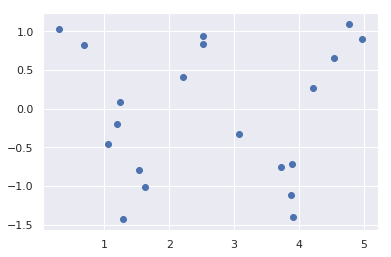

In [5]:
NUM_OBS_POINTS = 20
index_points, observations = toy_data(NUM_OBS_POINTS, 0.1)
plt.scatter(index_points, observations)

In [6]:
amplitude = tf.nn.softplus(tfe.Variable(initial_value=5.,
                                        name='amplitude',
                                        dtype=np.float64))
length_scale = tf.nn.softplus(tfe.Variable(initial_value=10.,
                                           name='length_scale',
                                           dtype=np.float64))
noise_variance = tf.nn.softplus(tfe.Variable(initial_value=1.,
                                             name='noise_variance',
                                             dtype=np.float64))

kernel = tfk.ExponentiatedQuadratic(amplitude, length_scale)

In [7]:
gp = tfd.GaussianProcess(kernel=kernel,
                         index_points=index_points,
                         observation_noise_variance=noise_variance)

AttributeError: module 'tensorflow_probability.python.distributions' has no attribute 'GaussianProcess'